# Modeling
## Classification

in this notebook we will discuss the remaining classification algorithms which are: decision tree, random forest and gradient boosting.

----

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import warnings
import matplotlib
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 200)
import seaborn as sns
from openpyxl import load_workbook
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
from sklearn import preprocessing
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from tqdm import tqdm_notebook, tqdm
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import itertools
import seaborn as sns

In [2]:
xls = pd.ExcelFile("data/main dataset v3.0 .xlsx")
ad_post = pd.read_excel(xls, 'Ad-Post')
ad_story = pd.read_excel(xls, 'Ad-Story')
influencer = pd.read_excel(xls, 'Influencer')
leaders_post = pd.read_excel(xls, 'Leaders-Post')
leaders_story = pd.read_excel(xls, 'Leaders-Story')
post = pd.read_excel(xls, 'Post')
story = pd.read_excel(xls, 'Story')
print('Datasets Loaded Completely.')

Datasets Loaded Completely.


In [3]:
#dummying dataset

# advertising posts
dummy_field = pd.get_dummies(ad_post['field'], prefix='field')
ad_post_dummy = pd.concat([ad_post, dummy_field], axis=1)
ad_post_dummy.drop(['field'], axis=1, inplace=True)

# advertising stories
dummy_field = pd.get_dummies(ad_story['field'], prefix='field')
ad_story_dummy = pd.concat([ad_story, dummy_field], axis=1)
ad_story_dummy.drop(['field'], axis=1, inplace=True)

#influencer
dummy_gender = pd.get_dummies(influencer['gender'], prefix='gender')
dummy_field = pd.get_dummies(influencer['field'], prefix='field')
influencer_dummy = pd.concat([influencer, dummy_gender, dummy_field], axis=1)
influencer_dummy.drop(['gender', 'field'], axis=1, inplace=True)

#leaders posts
dummy_gender = pd.get_dummies(leaders_post['gender'], prefix='gender')
leaders_post_dummy = pd.concat([leaders_post, dummy_gender], axis=1)
leaders_post_dummy.drop(['gender'], axis=1, inplace=True)

In [4]:
# label encoding dataset

# advertising posts
labels, _ = pd.factorize(ad_post['field'])
ad_post_labelencoded = ad_post
ad_post_labelencoded['field_labelencoded'] = labels.tolist()

# advertising stories
labels, _ = pd.factorize(ad_story['field'])
ad_story_labelencoded = ad_story
ad_story_labelencoded['field_labelencoded'] = labels.tolist()

# influencer
labels, _ = pd.factorize(influencer['gender'])
influencer_labelencoded = influencer
influencer_labelencoded['gender_labelencoded'] = labels.tolist()
labels, _ = pd.factorize(influencer['field'])
influencer_labelencoded['field_labelencoded'] = labels.tolist()

# leaders post
labels, _ = pd.factorize(leaders_post['gender'])
leaders_post_labelencoded = leaders_post
leaders_post_labelencoded['gender_labelencoded'] = labels.tolist()

In [5]:
ad_post_y = np.asarray(ad_post_dummy[['benefit']])
ad_post_x = np.asarray(ad_post_dummy[['follower', 'view', 'cost', 'field_art & culture', 'field_fact', 'field_video', 'field_women']])

ad_story_y = np.asarray(ad_story_dummy[['benefit']])
ad_story_x = np.asarray(ad_story_dummy[['view', 'follower', 'action', 'interaction', 'impression', 'cost', 'field_art & culture', 'field_fact', 'field_health',
                                       'field_news', 'field_video', 'field_women']])

influencer_y = np.asarray(influencer_dummy[['benefit']])
influencer_x = np.asarray(influencer_dummy[['follower', 'view', 'action', 'impression', 'cta', 'interaction', 'cost', 'gender_family', 'gender_female', 'gender_male',
                                           'field_cooking', 'field_health', 'field_lifestyle', 'field_sport', 'field_tourism']])

leaders_post_y = np.asarray(leaders_post_dummy[['benefit']])
leaders_post_x = np.asarray(leaders_post_dummy[['follower', 'view', 'like', 'comment', 'share', 'save', 'profile_visit', 'reach', 'impression', 'cost', 'gender_family',
                                               'gender_female', 'gender_male']])

In [6]:
ad_post_x = preprocessing.StandardScaler().fit(ad_post_x).transform(ad_post_x)
ad_story_x = preprocessing.StandardScaler().fit(ad_story_x).transform(ad_story_x)
influencer_x = preprocessing.StandardScaler().fit(influencer_x).transform(influencer_x)
leaders_post_x = preprocessing.StandardScaler().fit(leaders_post_x).transform(leaders_post_x)

### Decision Tree
#### Advertising Posts

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.colors import ListedColormap

In [8]:
criterion = ['gini', 'entropy']

In [9]:
temp_lst = []
for i in tqdm_notebook(range(2, 9)):
    kf = KFold(n_splits = i)
    for train_index, test_index in kf.split(ad_post_x):
        X_train, X_test = ad_post_x[train_index], ad_post_x[test_index]
        y_train, y_test = ad_post_y[train_index], ad_post_y[test_index]
        for c in criterion:
            dtc = DecisionTreeClassifier(criterion = c)
            dtc.fit(X_train, y_train)
            temp_lst2 = []
            temp_lst2.append(i)
            temp_lst2.append(c)
            temp_lst2.append(dtc.score(X_train, y_train))
            temp_lst2.append(dtc.score(X_test, y_test))
            temp_lst.append(temp_lst2)

temp_df = pd.DataFrame(temp_lst, columns=['k', 'Criterion', 'DTC Train Score', 'DTC Test Score'])

temp_lst = []
for k in range(2, 9):
    for c_ in criterion:
        temp_lst2 = []
        temp_lst2.append(k)
        temp_lst2.append(c_)
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['Criterion'] == c_)]['DTC Train Score']), decimals=4))
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['Criterion'] == c_)]['DTC Test Score']), decimals=4))
        temp_lst.append(temp_lst2)

dt_clf_eval_df = pd.DataFrame(temp_lst, columns=['k', 'Criterion', 'DTC Train Score', 'DTC Test Score'])
dt_clf_eval_df

,k,Criterion,DTC Train Score,DTC Test Score
0,2,gini,1.00,0.71
1,2,entropy,1.00,0.63
2,3,gini,1.00,0.74
3,3,entropy,1.00,0.78
4,4,gini,1.00,0.65
5,4,entropy,1.00,0.61
6,5,gini,1.00,0.58
7,5,entropy,1.00,0.66
8,6,gini,1.00,0.68
9,6,entropy,1.00,0.72


In [10]:
dt_clf_eval_df.nlargest(3, 'DTC Test Score')

,k,Criterion,DTC Train Score,DTC Test Score
3,3,entropy,1.00,0.78
2,3,gini,1.00,0.74
9,6,entropy,1.00,0.72


In [11]:
kf = KFold(n_splits = 3)
temp_lst = []
clf_dt = DecisionTreeClassifier(criterion = 'entropy')
for train_index, test_index in kf.split(ad_post_x):
    X_train, X_test = ad_post_x[train_index], ad_post_x[test_index]
    y_train, y_test = ad_post_y[train_index], ad_post_y[test_index]
    clf_dt.fit(X_train, y_train)
    y_hat = clf_dt.predict(X_test)
    y_hat_prob = clf_dt.predict_proba(X_test)
    temp_lst2 = []
    temp_lst2.append(metrics.accuracy_score(y_train, clf_dt.predict(X_train)))
    temp_lst2.append(metrics.accuracy_score(y_test, y_hat))
    temp_lst2.append(metrics.f1_score(y_test, y_hat))
    temp_lst2.append(metrics.jaccard_score(y_test, y_hat))
    temp_lst2.append(metrics.log_loss(y_test, y_hat_prob))
    temp_lst2.append(y_test)
    temp_lst2.append(y_hat)
    temp_lst2.append(X_test)
    temp_lst.append(temp_lst2)

In [12]:
temp_lst_ytest, temp_lst_yhat, temp_lst_xtest = [], [], []
for row in temp_lst:
    for i in row[5]:
        temp_lst_ytest.append(i)
    for j in row[6]:
        temp_lst_yhat.append(j)
    for k in row[7]:
        temp_lst_xtest.append(k)
    
cnf_ytest = np.array(temp_lst_ytest)
cnf_yhat = np.array(temp_lst_yhat)
cnf_xtest = np.array(temp_lst_xtest)
print(metrics.classification_report(cnf_ytest, cnf_yhat))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.76      0.87      0.81        15

    accuracy                           0.78        27
   macro avg       0.78      0.77      0.77        27
weighted avg       0.78      0.78      0.77        27



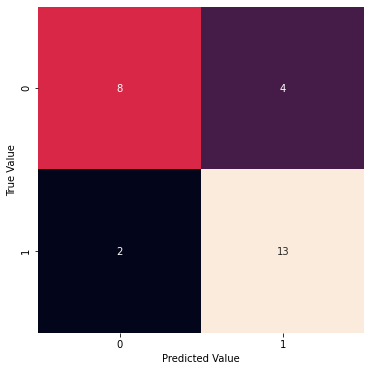

In [15]:
cnf_matrix = confusion_matrix(cnf_ytest, cnf_yhat)
plt.figure(figsize=(8,6))
sns.heatmap(cnf_matrix, square=True, annot=True, cbar=False)
# plt.xticks([.5, 1.5, 2.5], [-1, 0, 1])
# plt.yticks([.5, 1.5, 2.5], [-1, 0, 1])
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

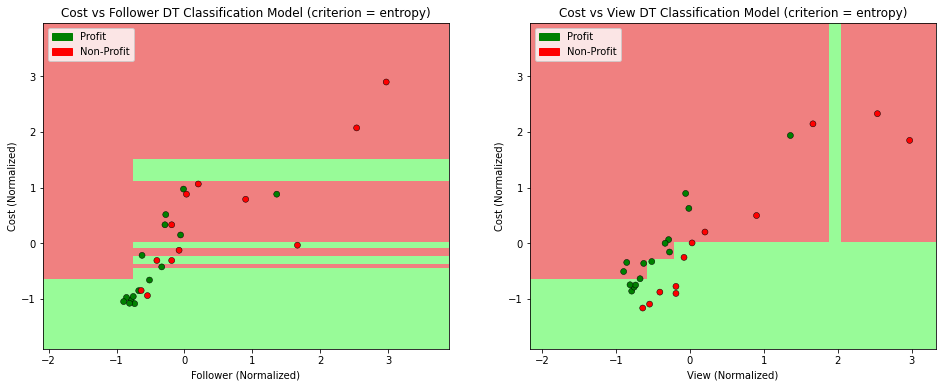

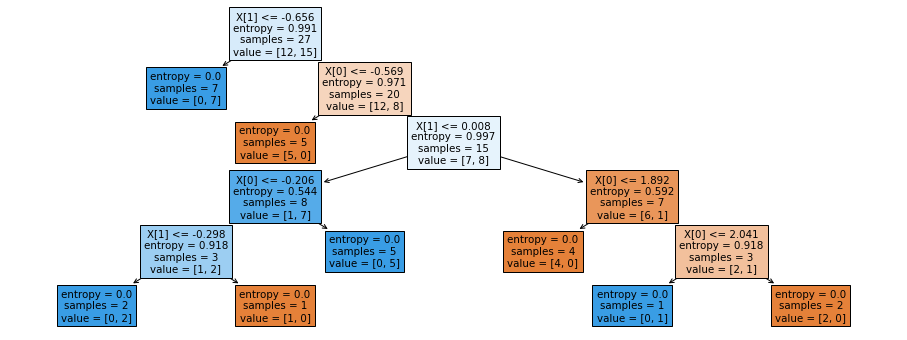

In [33]:
fig = plt.figure(figsize = (16, 6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

X,y = ad_post_x[:,:3], ad_post_y
h = .01
cmap_light = ListedColormap(['lightcoral', 'palegreen'])
cmap_bold = ['r', 'g']
X_follower = X[:,(0,2)]
X_view = X[:,(1,2)]

xx_follower, xx_view = None, None
yy_follower, yy_view = None, None
Z_follower, Z_view = None, None
g1, g2 = None, None

X_lst = [X_follower, X_view]
xx_lst = [xx_follower, xx_view]
yy_lst = [yy_follower, yy_view]
Z_lst = [Z_follower, Z_view]
ax_lst = [ax1, ax2]
g_lst = [g1, g2]
x_label_lst = ['Follower', 'View']
labels=['Non-Profit','Profit']
red_patch = patches.Patch(color='r', label='Non-Profit')
green_patch = patches.Patch(color='g', label='Profit')


def plot_calc(x, y = y):
    '''
    This function is for calculating the area to plot with colors according to the input
        input -> x and y.
        return -> xx, yy, Z which are needed to drawing the contour and plot.
    '''
    clf_dt.fit(x, y)
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf_dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return xx, yy, Z

for ax_, xx_, yy_, Z_, X_, x_label_, g_ in zip(ax_lst, xx_lst, yy_lst, Z_lst, X_lst, x_label_lst, g_lst):
    xx_, yy_, Z_ = plot_calc(X_, y)
    ax_.contourf(xx_, yy_, Z_, cmap=cmap_light)
    g_ = sns.scatterplot(x=X_[:, 1], y=X_[:, 0], hue=ad_post['benefit'], palette=cmap_bold, alpha=1.0, edgecolor='black', ax=ax_)
    ax_.set_title(f'Cost vs {x_label_} DT Classification Model (criterion = entropy)')
    ax_.set_xlim(xx_.min(), xx_.max())
    ax_.set_ylim(yy_.min(), yy_.max())
    ax_.set_xlabel(f'{x_label_} (Normalized)')
    ax_.set_ylabel('Cost (Normalized)')
    ax_.legend(handles=[green_patch, red_patch],loc = 'upper left', fontsize = 10);

plt.show()
plt.figure(figsize = (16, 6))
plot_tree(clf_dt, filled=True)
plt.show()

#### Advertising Story

In [23]:
temp_lst = []
for i in tqdm_notebook(range(2, 9)):
    kf = KFold(n_splits = i)
    for train_index, test_index in kf.split(ad_story_x):
        X_train, X_test = ad_story_x[train_index], ad_story_x[test_index]
        y_train, y_test = ad_story_y[train_index], ad_story_y[test_index]
        for c in criterion:
            dtc = DecisionTreeClassifier(criterion = c)
            dtc.fit(X_train, y_train)
            temp_lst2 = []
            temp_lst2.append(i)
            temp_lst2.append(c)
            temp_lst2.append(dtc.score(X_train, y_train))
            temp_lst2.append(dtc.score(X_test, y_test))
            temp_lst.append(temp_lst2)

temp_df = pd.DataFrame(temp_lst, columns=['k', 'Criterion', 'DTC Train Score', 'DTC Test Score'])

temp_lst = []
for k in range(2, 9):
    for c_ in criterion:
        temp_lst2 = []
        temp_lst2.append(k)
        temp_lst2.append(c_)
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['Criterion'] == c_)]['DTC Train Score']), decimals=4))
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['Criterion'] == c_)]['DTC Test Score']), decimals=4))
        temp_lst.append(temp_lst2)

dt_clf_eval_df = pd.DataFrame(temp_lst, columns=['k', 'Criterion', 'DTC Train Score', 'DTC Test Score'])
dt_clf_eval_df

,k,Criterion,DTC Train Score,DTC Test Score
0,2,gini,1.00,0.63
1,2,entropy,1.00,0.74
2,3,gini,1.00,0.74
3,3,entropy,1.00,0.63
4,4,gini,1.00,0.74
5,4,entropy,1.00,0.74
6,5,gini,1.00,0.71
7,5,entropy,1.00,0.63
8,6,gini,1.00,0.69
9,6,entropy,1.00,0.63


In [24]:
dt_clf_eval_df.nlargest(3, 'DTC Test Score')

,k,Criterion,DTC Train Score,DTC Test Score
13,8,entropy,1.00,0.78
12,8,gini,1.00,0.77
11,7,entropy,1.00,0.76


In [27]:
kf = KFold(n_splits = 8)
temp_lst = []
clf_dt = DecisionTreeClassifier(criterion = 'entropy')
for train_index, test_index in kf.split(ad_story_x):
    X_train, X_test = ad_story_x[train_index], ad_story_x[test_index]
    y_train, y_test = ad_story_y[train_index], ad_story_y[test_index]
    clf_dt.fit(X_train, y_train)
    y_hat = clf_dt.predict(X_test)
    y_hat_prob = clf_dt.predict_proba(X_test)
    temp_lst2 = []
    temp_lst2.append(metrics.accuracy_score(y_train, clf_dt.predict(X_train)))
    temp_lst2.append(metrics.accuracy_score(y_test, y_hat))
    temp_lst2.append(metrics.f1_score(y_test, y_hat))
    temp_lst2.append(metrics.jaccard_score(y_test, y_hat))
    temp_lst2.append(y_test)
    temp_lst2.append(y_hat)
    temp_lst2.append(X_test)
    temp_lst.append(temp_lst2)

In [29]:
temp_lst_ytest, temp_lst_yhat, temp_lst_xtest = [], [], []
for row in temp_lst:
    for i in row[4]:
        temp_lst_ytest.append(i)
    for j in row[5]:
        temp_lst_yhat.append(j)
    for k in row[6]:
        temp_lst_xtest.append(k)
    
cnf_ytest = np.array(temp_lst_ytest)
cnf_yhat = np.array(temp_lst_yhat)
cnf_xtest = np.array(temp_lst_xtest)
print(metrics.classification_report(cnf_ytest, cnf_yhat))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.79      0.94      0.86        16

    accuracy                           0.81        27
   macro avg       0.83      0.79      0.80        27
weighted avg       0.82      0.81      0.81        27



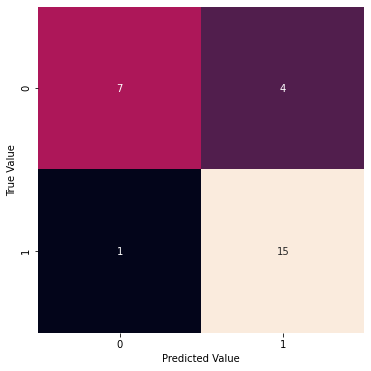

In [30]:
cnf_matrix = confusion_matrix(cnf_ytest, cnf_yhat)
plt.figure(figsize=(8,6))
sns.heatmap(cnf_matrix, square=True, annot=True, cbar=False)
# plt.xticks([.5, 1.5, 2.5], [-1, 0, 1])
# plt.yticks([.5, 1.5, 2.5], [-1, 0, 1])
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

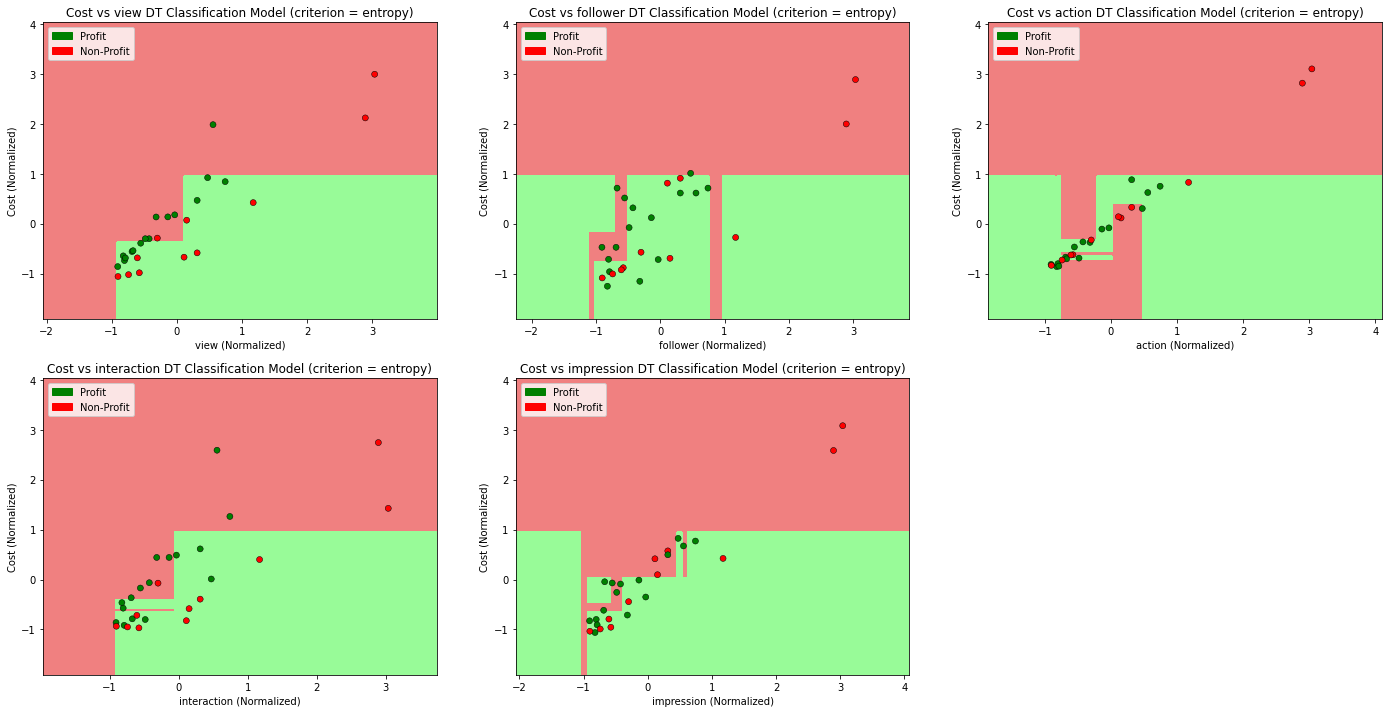

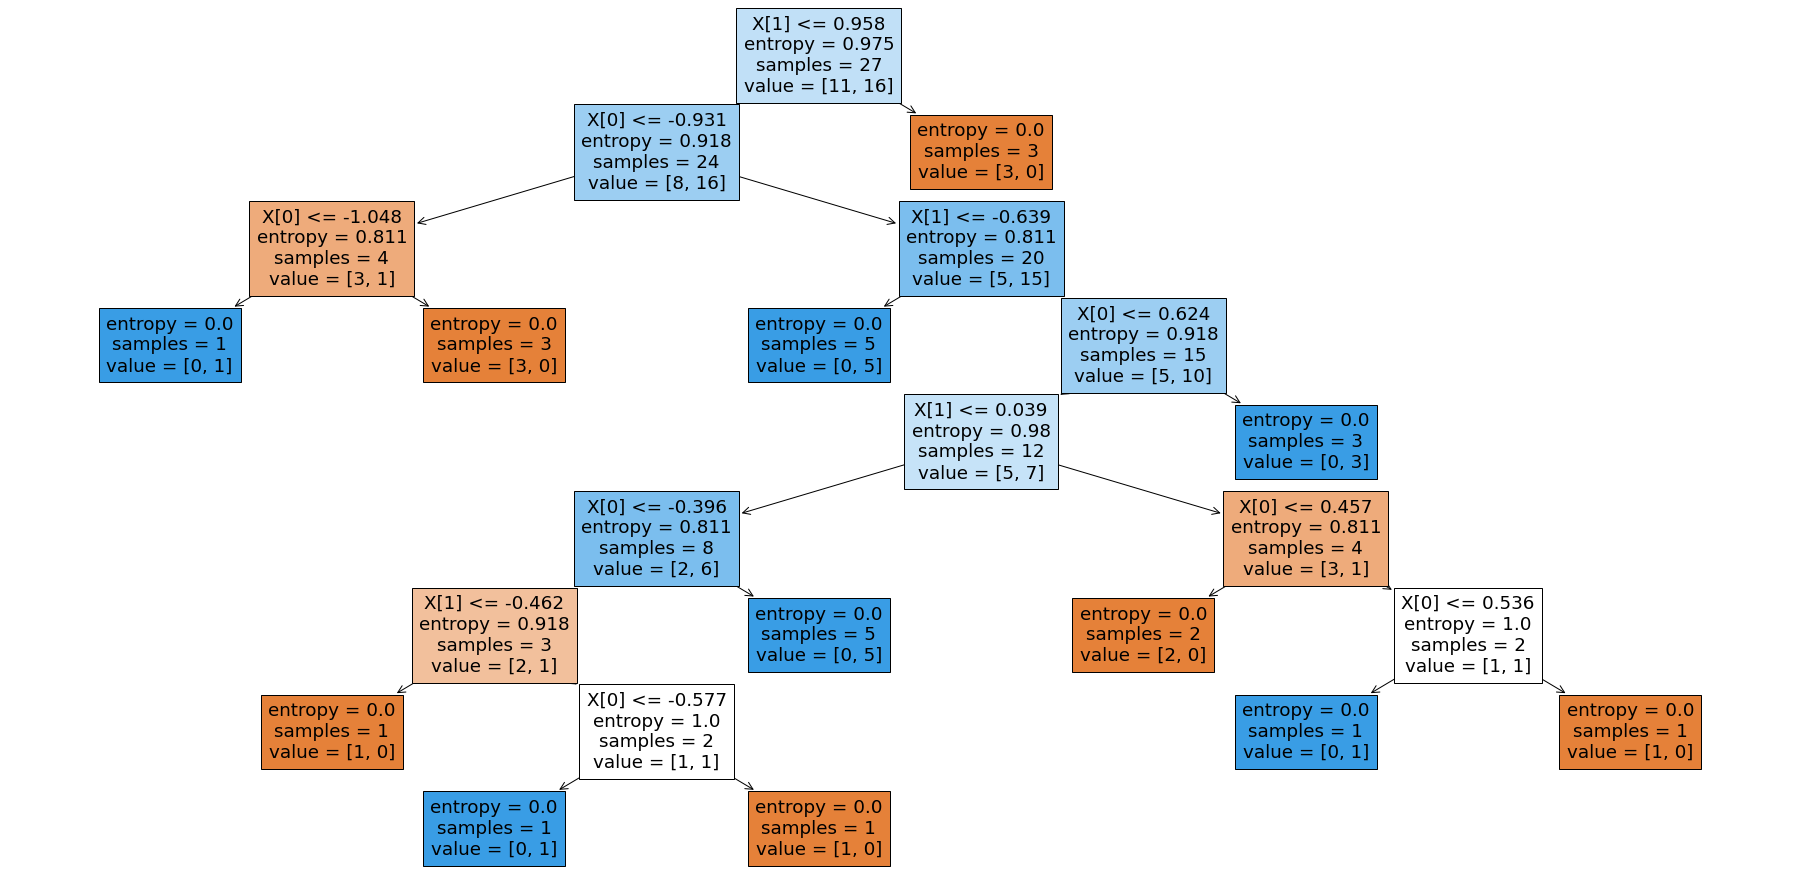

In [47]:
fig = plt.figure(figsize = (24, 12))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)


X,y = ad_story_x[:,:6], ad_story_y
h = .01
cmap_light = ListedColormap(['lightcoral', 'palegreen'])
cmap_bold = ['r', 'g']
X_view = X[:,(0,5)]
X_follower = X[:,(1,5)]
X_action = X[:,(2,5)]
X_interaction = X[:,(3,5)]
X_impression = X[:,(4,5)]


xx_view, xx_follower, xx_action, xx_interaction, xx_impression = None, None, None, None, None
yy_view, yy_follower, yy_action, yy_interaction, yy_impression = None, None, None, None, None
Z_view, Z_follower, Z_action, Z_interaction, Z_impression = None, None, None, None, None
g1, g2, g3, g4, g5 = None, None, None, None, None

X_lst = [X_view, X_follower, X_action, X_interaction, X_impression]
xx_lst = [xx_view, xx_follower, xx_action, xx_interaction, xx_impression]
yy_lst = [yy_view, yy_follower, yy_action, yy_interaction, yy_impression]
Z_lst = [Z_view, Z_follower, Z_action, Z_interaction, Z_impression]
ax_lst = [ax1, ax2, ax3, ax4, ax5]
g_lst = [g1, g2, g3, g4, g5]
x_label_lst = ['view', 'follower', 'action', 'interaction', 'impression']
labels=['Non-Profit','Profit']
red_patch = patches.Patch(color='r', label='Non-Profit')
green_patch = patches.Patch(color='g', label='Profit')


def plot_calc(x, y = y):
    '''
    This function is for calculating the area to plot with colors according to the input
        input -> x and y.
        return -> xx, yy, Z which are needed to drawing the contour and plot.
    '''
    clf_dt.fit(x, y)
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf_dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return xx, yy, Z

for ax_, xx_, yy_, Z_, X_, x_label_, g_ in zip(ax_lst, xx_lst, yy_lst, Z_lst, X_lst, x_label_lst, g_lst):
    xx_, yy_, Z_ = plot_calc(X_, y)
    ax_.contourf(xx_, yy_, Z_, cmap=cmap_light)
    g_ = sns.scatterplot(x=X_[:, 1], y=X_[:, 0], hue=ad_story['benefit'], palette=cmap_bold, alpha=1.0, edgecolor='black', ax=ax_)
    ax_.set_title(f'Cost vs {x_label_} DT Classification Model (criterion = entropy)')
    ax_.set_xlim(xx_.min(), xx_.max())
    ax_.set_ylim(yy_.min(), yy_.max())
    ax_.set_xlabel(f'{x_label_} (Normalized)')
    ax_.set_ylabel('Cost (Normalized)')
    ax_.legend(handles=[green_patch, red_patch],loc = 'upper left', fontsize = 10);
    
plt.show()
plt.figure(figsize = (32, 16))
plot_tree(clf_dt, filled=True)
plt.show()

#### Influencer

In [35]:
temp_lst = []
for i in tqdm_notebook(range(2, 9)):
    kf = KFold(n_splits = i)
    for train_index, test_index in kf.split(influencer_x):
        X_train, X_test = influencer_x[train_index], influencer_x[test_index]
        y_train, y_test = influencer_y[train_index], influencer_y[test_index]
        for c in criterion:
            dtc = DecisionTreeClassifier(criterion = c)
            dtc.fit(X_train, y_train)
            temp_lst2 = []
            temp_lst2.append(i)
            temp_lst2.append(c)
            temp_lst2.append(dtc.score(X_train, y_train))
            temp_lst2.append(dtc.score(X_test, y_test))
            temp_lst.append(temp_lst2)

temp_df = pd.DataFrame(temp_lst, columns=['k', 'Criterion', 'DTC Train Score', 'DTC Test Score'])

temp_lst = []
for k in range(2, 9):
    for c_ in criterion:
        temp_lst2 = []
        temp_lst2.append(k)
        temp_lst2.append(c_)
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['Criterion'] == c_)]['DTC Train Score']), decimals=4))
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['Criterion'] == c_)]['DTC Test Score']), decimals=4))
        temp_lst.append(temp_lst2)

dt_clf_eval_df = pd.DataFrame(temp_lst, columns=['k', 'Criterion', 'DTC Train Score', 'DTC Test Score'])
dt_clf_eval_df

,k,Criterion,DTC Train Score,DTC Test Score
0,2,gini,1.00,0.49
1,2,entropy,1.00,0.47
2,3,gini,1.00,0.47
3,3,entropy,1.00,0.35
4,4,gini,1.00,0.58
5,4,entropy,1.00,0.63
6,5,gini,1.00,0.54
7,5,entropy,1.00,0.58
8,6,gini,1.00,0.65
9,6,entropy,1.00,0.66


In [36]:
dt_clf_eval_df.nlargest(3, 'DTC Test Score')

,k,Criterion,DTC Train Score,DTC Test Score
13,8,entropy,1.00,0.79
11,7,entropy,1.00,0.70
9,6,entropy,1.00,0.66


In [38]:
kf = KFold(n_splits = 8)
temp_lst = []
clf_dt = DecisionTreeClassifier(criterion = 'entropy')
for train_index, test_index in kf.split(influencer_x):
    X_train, X_test = influencer_x[train_index], influencer_x[test_index]
    y_train, y_test = influencer_y[train_index], influencer_y[test_index]
    clf_dt.fit(X_train, y_train)
    y_hat = clf_dt.predict(X_test)
    y_hat_prob = clf_dt.predict_proba(X_test)
    temp_lst2 = []
    temp_lst2.append(metrics.accuracy_score(y_train, clf_dt.predict(X_train)))
    temp_lst2.append(metrics.accuracy_score(y_test, y_hat))
    temp_lst2.append(metrics.f1_score(y_test, y_hat, average='micro'))
    temp_lst2.append(metrics.jaccard_score(y_test, y_hat, average='micro'))
    temp_lst2.append(y_test)
    temp_lst2.append(y_hat)
    temp_lst2.append(X_test)
    temp_lst.append(temp_lst2)

In [39]:
temp_lst_ytest, temp_lst_yhat, temp_lst_xtest = [], [], []
for row in temp_lst:
    for i in row[4]:
        temp_lst_ytest.append(i)
    for j in row[5]:
        temp_lst_yhat.append(j)
    for k in row[6]:
        temp_lst_xtest.append(k)
    
cnf_ytest = np.array(temp_lst_ytest)
cnf_yhat = np.array(temp_lst_yhat)
cnf_xtest = np.array(temp_lst_xtest)
print(metrics.classification_report(cnf_ytest, cnf_yhat))

              precision    recall  f1-score   support

          -1       0.77      0.74      0.76        23
           0       0.77      0.77      0.77        43
           1       0.81      0.83      0.82        36

    accuracy                           0.78       102
   macro avg       0.78      0.78      0.78       102
weighted avg       0.78      0.78      0.78       102



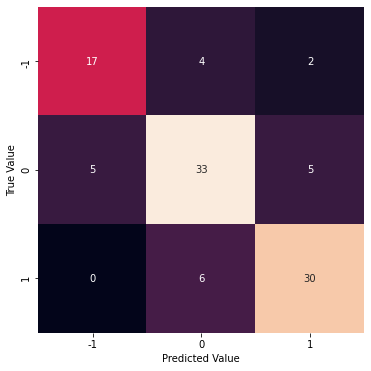

In [40]:
cnf_matrix = confusion_matrix(cnf_ytest, cnf_yhat)
plt.figure(figsize=(8,6))
sns.heatmap(cnf_matrix, square=True, annot=True, cbar=False)
plt.xticks([.5, 1.5, 2.5], [-1, 0, 1])
plt.yticks([.5, 1.5, 2.5], [-1, 0, 1])
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

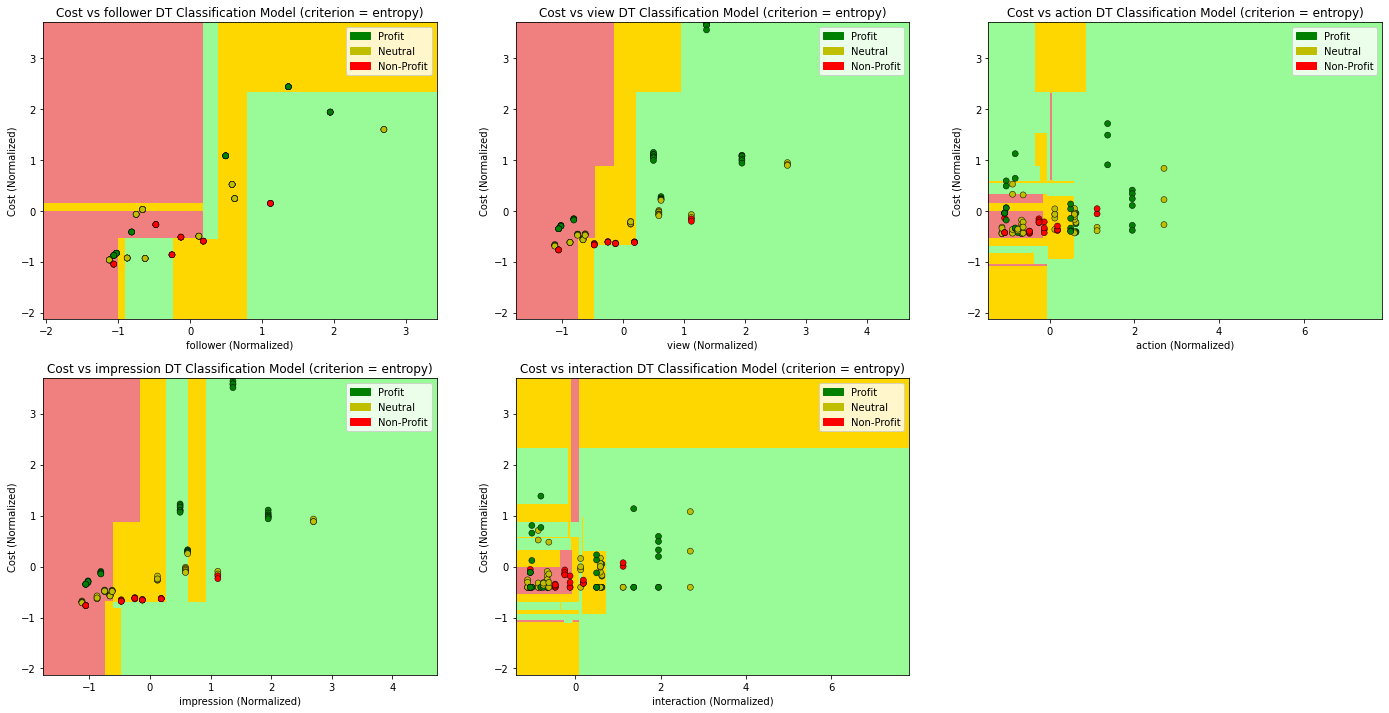

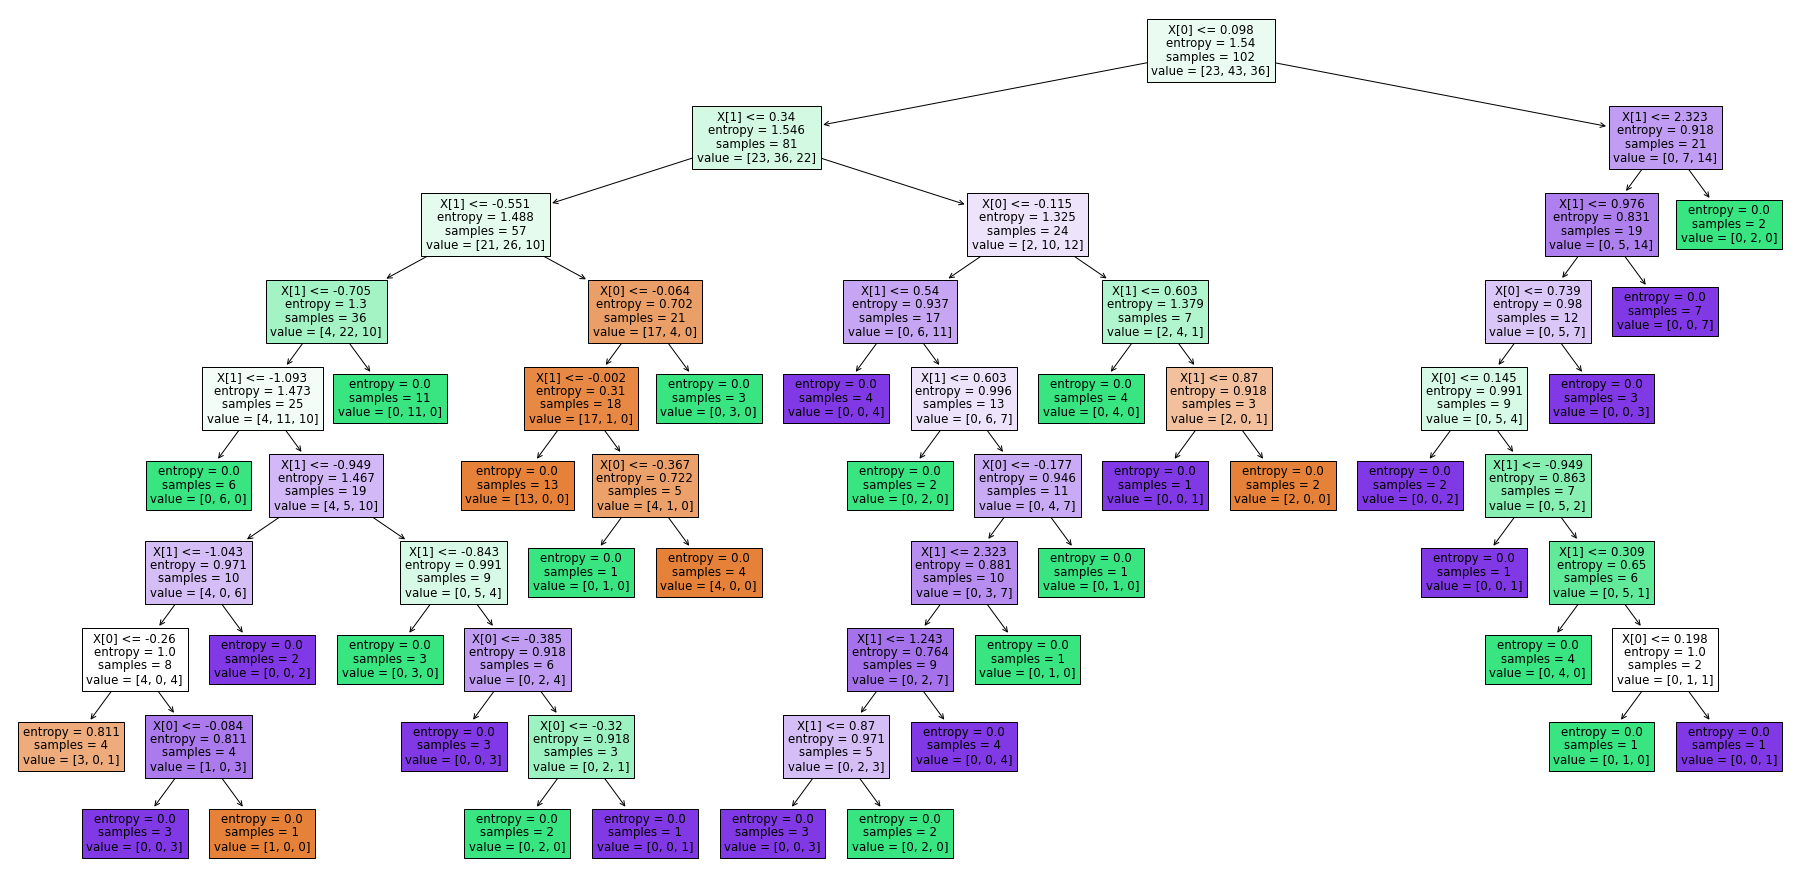

In [46]:
fig = plt.figure(figsize = (24, 12))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)


X,y = influencer_x[:,:7], influencer_y
h = .01
cmap_light = ListedColormap(['lightcoral', 'gold', 'palegreen'])
cmap_bold = ['r', 'y', 'g']
X_follower = X[:,(0,6)]
X_view = X[:,(1,6)]
X_action = X[:,(2,6)]
X_impression = X[:,(3,6)]
X_interaction = X[:,(5,6)]


xx_follower, xx_view, xx_action, xx_impression, xx_interaction = None, None, None, None, None
yy_follower, yy_view, yy_action, yy_impression, yy_interaction = None, None, None, None, None
Z_follower, Z_view, Z_action, Z_impression, Z_interaction = None, None, None, None, None
g1, g2, g3, g4, g5 = None, None, None, None, None

X_lst = [X_follower, X_view, X_action, X_impression, X_interaction]
xx_lst = [xx_follower, xx_view, xx_action, xx_impression, xx_interaction]
yy_lst = [yy_follower, yy_view, yy_action, yy_impression, yy_interaction]
Z_lst = [Z_follower, Z_view, Z_action, Z_impression, Z_interaction]
ax_lst = [ax1, ax2, ax3, ax4, ax5]
g_lst = [g1, g2, g3, g4, g5]
x_label_lst = ['follower', 'view', 'action', 'impression', 'interaction']
labels=['Non-Profit','Neutral', 'Profit']
red_patch = patches.Patch(color='r', label='Non-Profit')
yellow_patch = patches.Patch(color='y', label='Neutral')
green_patch = patches.Patch(color='g', label='Profit')


def plot_calc(x, y = y):
    '''
    This function is for calculating the area to plot with colors according to the input
        input -> x and y.
        return -> xx, yy, Z which are needed to drawing the contour and plot.
    '''
    clf_dt.fit(x, y)
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf_dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return xx, yy, Z

for ax_, xx_, yy_, Z_, X_, x_label_, g_ in zip(ax_lst, xx_lst, yy_lst, Z_lst, X_lst, x_label_lst, g_lst):
    xx_, yy_, Z_ = plot_calc(X_, y)
    ax_.contourf(xx_, yy_, Z_, cmap=cmap_light)
    g_ = sns.scatterplot(x=X_[:, 1], y=X_[:, 0], hue=influencer['benefit'], palette=cmap_bold, alpha=1.0, edgecolor='black', ax=ax_)
    ax_.set_title(f'Cost vs {x_label_} DT Classification Model (criterion = entropy)')
    ax_.set_xlim(xx_.min(), xx_.max())
    ax_.set_ylim(yy_.min(), yy_.max())
    ax_.set_xlabel(f'{x_label_} (Normalized)')
    ax_.set_ylabel('Cost (Normalized)')
    ax_.legend(handles=[green_patch, yellow_patch, red_patch],loc = 'upper right', fontsize = 10);
    
plt.show()
plt.figure(figsize = (32, 16))
plot_tree(clf_dt, filled=True)
plt.show()

#### Leaders Post

In [48]:
temp_lst = []
for i in tqdm_notebook(range(2, 9)):
    kf = KFold(n_splits = i)
    for train_index, test_index in kf.split(leaders_post_x):
        X_train, X_test = leaders_post_x[train_index], leaders_post_x[test_index]
        y_train, y_test = leaders_post_y[train_index], leaders_post_y[test_index]
        for c in criterion:
            dtc = DecisionTreeClassifier(criterion = c)
            dtc.fit(X_train, y_train)
            temp_lst2 = []
            temp_lst2.append(i)
            temp_lst2.append(c)
            temp_lst2.append(dtc.score(X_train, y_train))
            temp_lst2.append(dtc.score(X_test, y_test))
            temp_lst.append(temp_lst2)

temp_df = pd.DataFrame(temp_lst, columns=['k', 'Criterion', 'DTC Train Score', 'DTC Test Score'])

temp_lst = []
for k in range(2, 9):
    for c_ in criterion:
        temp_lst2 = []
        temp_lst2.append(k)
        temp_lst2.append(c_)
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['Criterion'] == c_)]['DTC Train Score']), decimals=4))
        temp_lst2.append(np.round(np.mean(temp_df[(temp_df['k'] == k) & (temp_df['Criterion'] == c_)]['DTC Test Score']), decimals=4))
        temp_lst.append(temp_lst2)

dt_clf_eval_df = pd.DataFrame(temp_lst, columns=['k', 'Criterion', 'DTC Train Score', 'DTC Test Score'])
dt_clf_eval_df

,k,Criterion,DTC Train Score,DTC Test Score
0,2,gini,1.00,0.45
1,2,entropy,1.00,0.35
2,3,gini,1.00,0.33
3,3,entropy,1.00,0.56
4,4,gini,1.00,0.42
5,4,entropy,1.00,0.42
6,5,gini,1.00,0.40
7,5,entropy,1.00,0.40
8,6,gini,1.00,0.50
9,6,entropy,1.00,0.33


In [49]:
dt_clf_eval_df.nlargest(3, 'DTC Test Score')

,k,Criterion,DTC Train Score,DTC Test Score
13,8,entropy,1.00,0.56
3,3,entropy,1.00,0.56
8,6,gini,1.00,0.50


In [50]:
kf = KFold(n_splits = 8)
temp_lst = []
clf_dt = DecisionTreeClassifier(criterion = 'entropy')
for train_index, test_index in kf.split(leaders_post_x):
    X_train, X_test = leaders_post_x[train_index], leaders_post_x[test_index]
    y_train, y_test = leaders_post_y[train_index], leaders_post_y[test_index]
    clf_dt.fit(X_train, y_train)
    y_hat = clf_dt.predict(X_test)
    y_hat_prob = clf_dt.predict_proba(X_test)
    temp_lst2 = []
    temp_lst2.append(metrics.accuracy_score(y_train, clf_dt.predict(X_train)))
    temp_lst2.append(metrics.accuracy_score(y_test, y_hat))
    temp_lst2.append(metrics.f1_score(y_test, y_hat, average='micro'))
    temp_lst2.append(metrics.jaccard_score(y_test, y_hat, average='micro'))
    temp_lst2.append(y_test)
    temp_lst2.append(y_hat)
    temp_lst2.append(X_test)
    temp_lst.append(temp_lst2)

In [54]:
temp_lst_ytest, temp_lst_yhat, temp_lst_xtest = [], [], []
for row in temp_lst:
    for i in row[4]:
        temp_lst_ytest.append(i)
    for j in row[5]:
        temp_lst_yhat.append(j)
    for k in row[6]:
        temp_lst_xtest.append(k)
    
cnf_ytest = np.array(temp_lst_ytest)
cnf_yhat = np.array(temp_lst_yhat)
cnf_xtest = np.array(temp_lst_xtest)
print(metrics.classification_report(cnf_ytest, cnf_yhat))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         2
           0       0.60      0.60      0.60         5
           1       1.00      0.50      0.67         2

    accuracy                           0.44         9
   macro avg       0.53      0.37      0.42         9
weighted avg       0.56      0.44      0.48         9



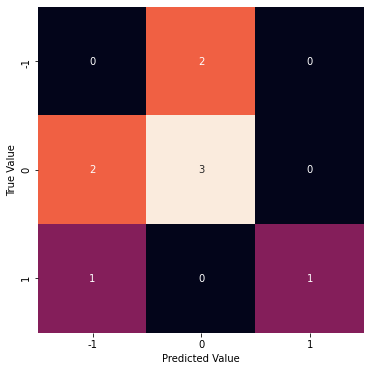

In [52]:
cnf_matrix = confusion_matrix(cnf_ytest, cnf_yhat)
plt.figure(figsize=(8,6))
sns.heatmap(cnf_matrix, square=True, annot=True, cbar=False)
plt.xticks([.5, 1.5, 2.5], [-1, 0, 1])
plt.yticks([.5, 1.5, 2.5], [-1, 0, 1])
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()

9it [00:00,  9.61it/s]


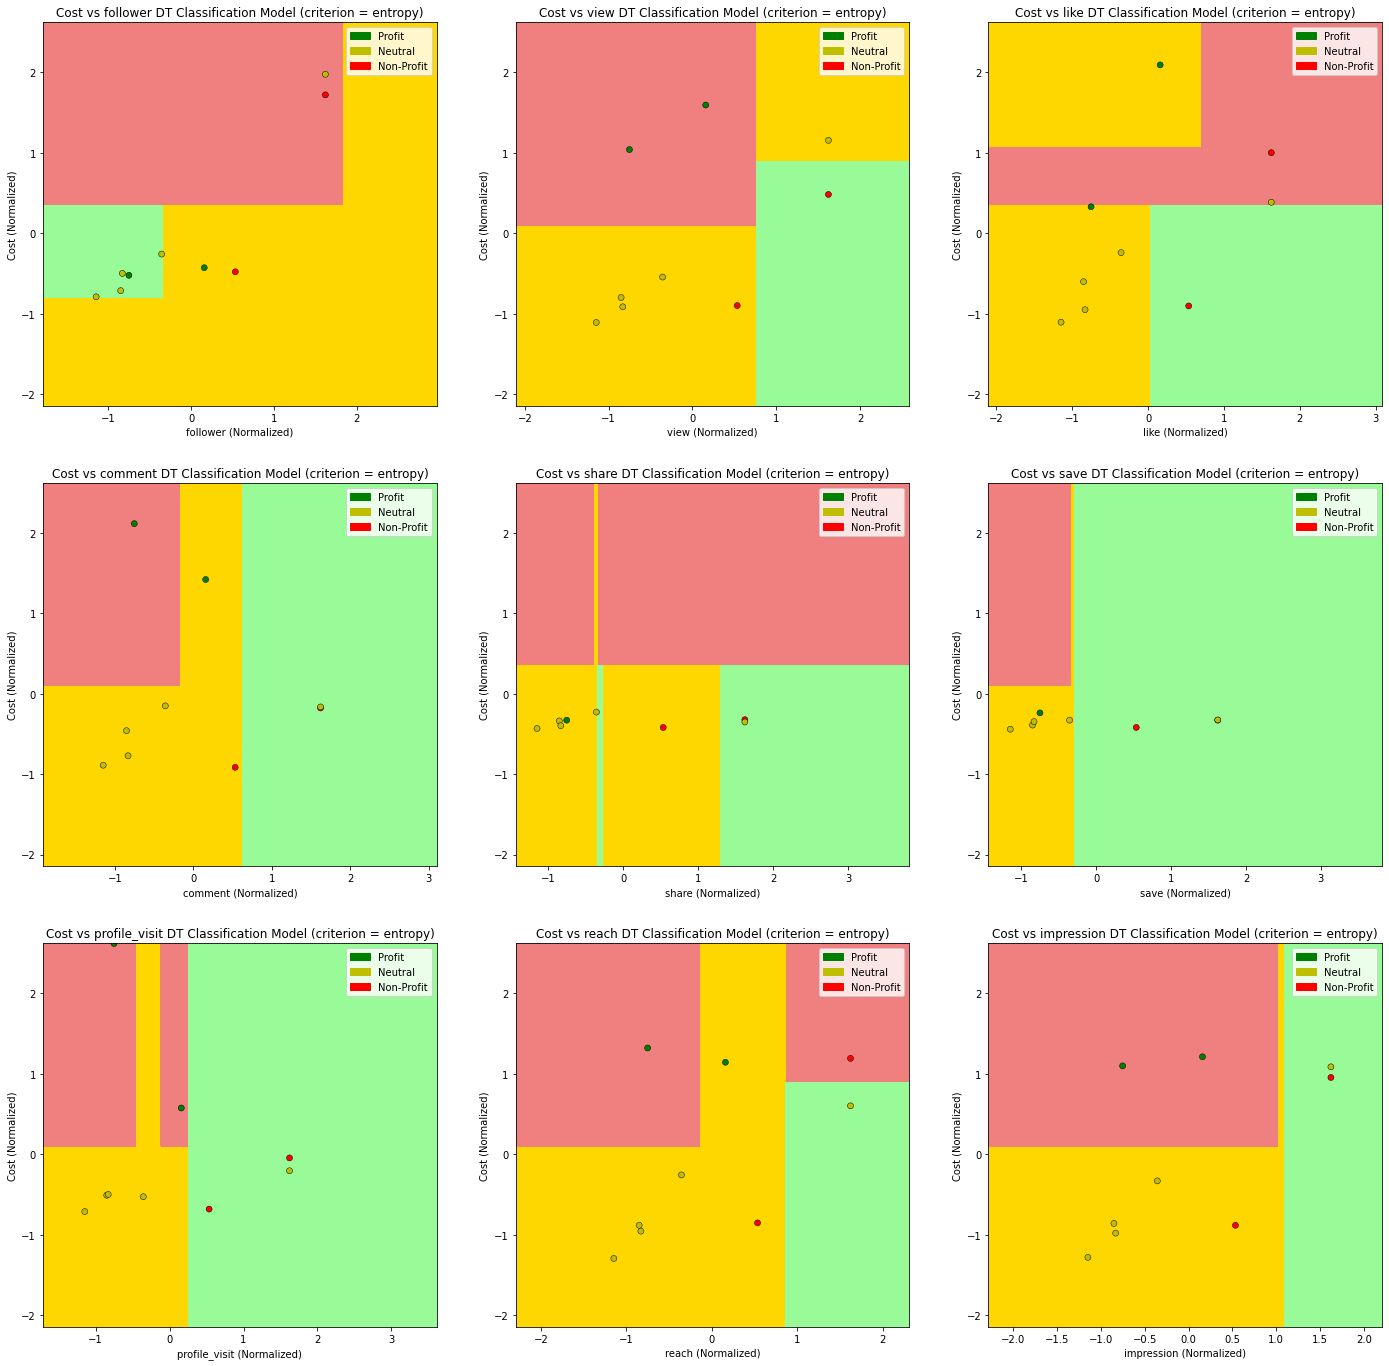

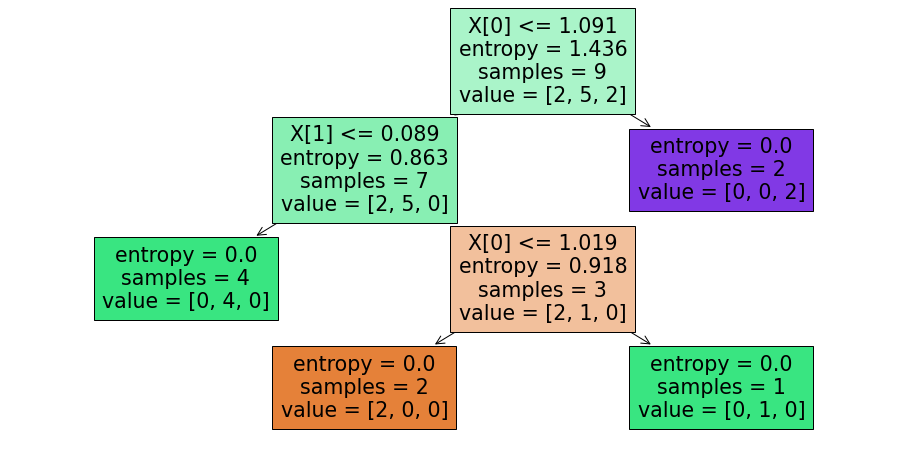

In [56]:
fig = plt.figure(figsize = (24, 24))
ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)
ax7 = fig.add_subplot(3,3,7)
ax8 = fig.add_subplot(3,3,8)
ax9 = fig.add_subplot(3,3,9)



X,y = leaders_post_x[:,:10], leaders_post_y
h = .01
cmap_light = ListedColormap(['lightcoral', 'gold', 'palegreen'])
cmap_bold = ['r', 'y', 'g']
X_follower = X[:,(0,9)]
X_view = X[:,(1,9)]
X_like = X[:,(2,9)]
X_comment = X[:,(3,9)]
X_share = X[:,(4,9)]
X_save = X[:,(5,9)]
X_profile_visit = X[:,(6,9)]
X_reach = X[:,(7,9)]
X_impression = X[:,(8,9)]


xx_follower, xx_view, xx_like, xx_comment, xx_share, xx_save, xx_profile_visit, xx_reach, xx_impression = None, None, None, None, None, None, None, None, None
yy_follower, yy_view, yy_like, yy_comment, yy_share, yy_save, yy_profile_visit, yy_reach, yy_impression = None, None, None, None, None, None, None, None, None
Z_follower, Z_view, Z_like, Z_comment, Z_share, Z_save, Z_profile_visit, Z_reach, Z_impression = None, None, None, None, None, None, None, None, None
g1, g2, g3, g4, g5, g6, g7, g8, g9 = None, None, None, None, None, None, None, None, None

X_lst = [X_follower, X_view, X_like, X_comment, X_share, X_save, X_profile_visit, X_reach, X_impression]
xx_lst = [xx_follower, xx_view, xx_like, xx_comment, xx_share, xx_save, xx_profile_visit, xx_reach, xx_impression]
yy_lst = [yy_follower, yy_view, yy_like, yy_comment, yy_share, yy_save, yy_profile_visit, yy_reach, yy_impression]
Z_lst = [Z_follower, Z_view, Z_like, Z_comment, Z_share, Z_save, Z_profile_visit, Z_reach, Z_impression]
ax_lst = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
g_lst = [g1, g2, g3, g4, g5, g6, g7, g8, g9]
x_label_lst = ['follower', 'view', 'like', 'comment', 'share', 'save', 'profile_visit', 'reach', 'impression']
labels=['Profit','Neutral', 'Non-Profit']
red_patch = patches.Patch(color='r', label='Non-Profit')
yellow_patch = patches.Patch(color='y', label='Neutral')
green_patch = patches.Patch(color='g', label='Profit')


def plot_calc(x, y = y):
    '''
    This function is for calculating the area to plot with colors according to the input
        input -> x and y.
        return -> xx, yy, Z which are needed to drawing the contour and plot.
    '''
    clf_dt.fit(x, y)
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf_dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return xx, yy, Z

for ax_, xx_, yy_, Z_, X_, x_label_, g_ in tqdm(zip(ax_lst, xx_lst, yy_lst, Z_lst, X_lst, x_label_lst, g_lst)):
    xx_, yy_, Z_ = plot_calc(X_, y)
    ax_.contourf(xx_, yy_, Z_, cmap=cmap_light)
    g_ = sns.scatterplot(x=X_[:, 1], y=X_[:, 0], hue=leaders_post['benefit'], palette=cmap_bold, alpha=1.0, edgecolor='black', ax=ax_)
    ax_.set_title(f'Cost vs {x_label_} DT Classification Model (criterion = entropy)')
    ax_.set_xlim(xx_.min(), xx_.max())
    ax_.set_ylim(yy_.min(), yy_.max())
    ax_.set_xlabel(f'{x_label_} (Normalized)')
    ax_.set_ylabel('Cost (Normalized)')
    ax_.legend(handles=[green_patch, yellow_patch, red_patch],loc = 'upper right', fontsize = 10);
    
plt.show()
plt.figure(figsize = (16, 8))
plot_tree(clf_dt, filled=True)
plt.show()